# Proyecto 2
## Ingeniería de features, Modelos avanzados e Interpretación de modelos

- Carrera: Data Science
- Alumna: Marcela López Cechini

## Mi disparador
### ¿Qué puedo aprender del problema que estoy abordando mediante el estudio de mi propio modelo?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [21]:
base = pd.read_csv('DS_Proyecto_01_Datos_Properati (1).csv')
base

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [3]:
print(base.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


### PARTE A - Transformación de Datos

In [ ]:
Eliminamos que no concuerdan como las superficies cubiertas mayores a las superficies totales

In [22]:
datos_borrar = base[(base['surface_covered']) > (base['surface_total'])].index 
base = base.drop(datos_borrar) 

In [ ]:
Eliminamos los outliers

In [23]:
q25,q75 = np.percentile(base.price.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

111900.0 265000.0 153100.0 -117750.0 494650.0


In [25]:
mascara_outliers = (base.price < minimo) | (base.price > maximo)
base = base[mascara_outliers]

In [26]:
base.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,9759.000000,9759.000000,11075.000000,11075.000000,10502.000000,9704.000000,9573.000000,1.107500e+04
mean,-34.588737,-58.446112,4.695982,3.133363,3.147591,498.625515,237.329155,9.604799e+05
std,0.095981,0.137922,1.817414,1.346640,1.156345,3918.912934,797.043162,8.001617e+05
min,-35.120827,-64.255115,1.000000,0.000000,1.000000,43.000000,1.000000,4.950000e+05
25%,-34.609410,-58.462840,4.000000,3.000000,2.000000,160.000000,140.000000,5.800000e+05
50%,-34.584954,-58.423731,4.000000,3.000000,3.000000,220.000000,191.000000,7.200000e+05
75%,-34.564184,-58.390564,6.000000,4.000000,4.000000,343.000000,278.000000,1.070000e+06
max,-32.191642,-57.885654,26.000000,15.000000,13.000000,193549.000000,75792.000000,3.243423e+07


In [ ]:
Vamos a rellenar aquellos valores faltantes en surface_total con la media sin outliers 

In [31]:
base.fillna(base['surface_total'].mean(),inplace = True) #Esta es la imputación de valores faltantes 
base['surface_total'].isna().sum() # Verificamos que no queden valores faltantes

0

In [ ]:
Y hacemos lo mismo con los valores en surface_covered

In [32]:
base.fillna(base['surface_covered'].mean(),inplace = True) #Esta es la imputación de valores faltantes 
base['surface_covered'].isna().sum() # Verificamos que no queden valores faltantes

0

In [14]:
# base.surface_covered.replace(0, (base.property_type['Lote'])

SyntaxError: unexpected EOF while parsing (<ipython-input-14-3f871440ef7a>, line 1)

In [ ]:
Tipos_de_propiedades = Proyecto.groupby(['property_type']).size().reset_index(name='cantidad_tipo')
print(Tipos_de_propiedades)

In [16]:
conteo = base.surface_total.isnull().groupby([base['property_type']]).sum().astype(int).reset_index(name='count')

In [4]:
conteo

,property_type,count
0,Casa,4865
1,Casa de campo,64
2,Cochera,257
3,Departamento,13889
4,Depósito,258
5,Local comercial,303
6,Lote,1279
7,Oficina,281
8,Otro,263
9,PH,155


In [11]:
base.surface_total.isnull().groupby([base['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,4917
1,Casa de campo,64
2,Cochera,257
3,Departamento,13577
4,Depósito,257
5,Local comercial,301
6,Lote,607
7,Oficina,264
8,Otro,154
9,PH,129


In [13]:
valor = base.surface_total.isnull().groupby([base['l3']]).sum().astype(int).reset_index(name='count')
valor.sort_values(by=['count'])

,l3,count
13,Catalinas,0
86,Villa Soldati,2
84,Villa Riachuelo,3
72,Tribunales,7
1,Agronomía,8
...,...,...
8,Belgrano,833
3,Almirante Brown,865
71,Tres de Febrero,871
32,La Matanza,1115


In [15]:
Tipos_de_propiedades = base.groupby(['l3']).size().reset_index(name='cantidad_tipo')
Tipos_de_propiedades.sort_values(by='cantidad_tipo')

,l3,cantidad_tipo
13,Catalinas,5
39,Marcos Paz,35
84,Villa Riachuelo,42
86,Villa Soldati,69
14,Cañuelas,108
...,...,...
12,Caballito,6650
8,Belgrano,6935
2,Almagro,7527
70,Tigre,8718


<AxesSubplot:>

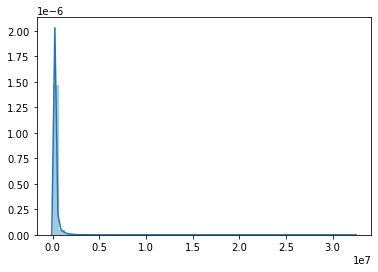

In [21]:
sns.distplot(base.price.values)

<AxesSubplot:>

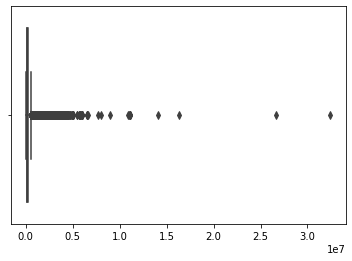

In [22]:
sns.boxplot(base.price.values)

In [23]:
q25,q75 = np.percentile(base.price.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

111000.0 265000.0 154000.0 -120000.0 496000.0


### PARTE B - Modelos Avanzados

### PARTE C - Interpretación de modelos